# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [30]:
colors = pd.read_csv(LEGO_DATA_FOLDER + '/colors.csv.zip')
inventories = pd.read_csv(LEGO_DATA_FOLDER + '/inventories.csv.zip')
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_parts.csv.zip')
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_sets.csv.zip')
part_categories = pd.read_csv(LEGO_DATA_FOLDER + '/part_categories.csv.zip')
parts = pd.read_csv(LEGO_DATA_FOLDER + '/parts.csv.zip')
sets = pd.read_csv(LEGO_DATA_FOLDER + '/sets.csv.zip')
themes = pd.read_csv(LEGO_DATA_FOLDER + '/themes.csv.zip')

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [31]:
#1: sets: year
years = sets['year']

#Helper function to check if a string represents a number (instead of isdigit, which fails on negative numbers)
def isInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False
    
#we notice multiple years represented as 'x0s', which we will interpret as and convert to the year '19x0'
def convert_decade_to_year(year):
    if not isInt(year):
        if type(year) is str and year[2] == 's':
            decade = year[0]
            return '19' + str(decade) + '0'
        else:
            #Other, unknown string case we did not handle yet
            raise Exception('Unknown non-integer year value: ' + str(year) + ' --> Update your cleaning function')

#We notice many negative years, such as -2003, so we will simply return their positive value
def make_year_positive(year):
        if not isInt(year):
            raise Exception('Year ' + year + ' does not represent an integer')
        else:
            year_int = int(year)
            if year_int < 0:
                positive_year = str(-year_int)
                return positive_year
            else:
                return year
                
def make_year_four_digits(year):
    if not isInt(year):
            raise Exception('Year ' + year + ' does not represent an integer')
    else:
        if len(year) > 4:
            #Remove last digit
            return year[:-1]
        else:
            return year
    
    
#Our check function: we want years to be non-null numbers between 1932 (the year lego was founded) and this year
def check_years(years_to_check):
    this_year = int(datetime.datetime.now().year)
    checks_out = True
    nb_years = len(years_to_check)
    for i in range(nb_years):
        year = years_to_check[i]
        #Check for non-string types, which could cause problems with parsing
        if not type(year) is str:
            print('FAILURE: ' + str(year) + ' is not of type string (type: ' + str(type(year)) +')')
            checks_out = False
        #Check for non-null values
        elif year is None:
            print('FAILURE: Null value found')
            checks_out = False
        #Check for string that do not represent integers
        elif not isInt(year):
            print('PROBLEM: ' + str(year) + ' does not represent an integer')
            print('Attempting correction')
            years_to_check[i] = convert_decade_to_year(year)
            year = years_to_check[i]
            print('RESOLUTION: ' + str(year))
        else:
            int_year = int(year)
            
            #Check year does not predate lego
            if int_year < 1932:
                print('PROBLEM: Year ' + str(year) + ' is before 1932, the year lego was founded, which is inconsistent')
                print('Attempting correction')
                years_to_check[i] = make_year_positive(year)
                year = years_to_check[i]
                print('RESOLUTION: ' + str(year))
            #Check year is not in the future
            elif this_year < int_year:
                print('PROBLEM: Year ' + str(year) + ' is in the future, which is inconsistent' )
                print('Attempting correction')
                years_to_check[i] = make_year_four_digits(year)
                year = years_to_check[i]
                print('RESOLUTION: ' + str(year))

    print('Final verdict: Checks passed? ' + str(checks_out))
    print('Range of years: ' + str(min(years_to_check)) + ' - ' + str(max(years_to_check)))
    return checks_out

#element type
check_years(years)


PROBLEM: 70s does not represent an integer
Attempting correction
RESOLUTION: 1970
PROBLEM: Year 19788 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1978
PROBLEM: Year 20011 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2001
PROBLEM: Year 20022 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2002
PROBLEM: Year -2003 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2003
PROBLEM: Year 20033 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2003
PROBLEM: Year 20022 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2002
PROBLEM: Year 20022 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2002
PROBLEM: Year 20033 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2003
PROBLEM: Year -2002 is before 1932, the year lego was founded, which is inconsistent
Attempting corre

PROBLEM: 80s does not represent an integer
Attempting correction
RESOLUTION: 1980
PROBLEM: Year -1981 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1981
PROBLEM: Year -1981 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1981
PROBLEM: Year 20022 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2002
PROBLEM: Year -1985 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1985
PROBLEM: Year -1986 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1986
PROBLEM: Year 20000 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year 19999 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1999
PROBLEM: Year -1999 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1999
P

PROBLEM: Year -1987 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1987
PROBLEM: Year 19855 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1985
PROBLEM: Year -1966 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1966
PROBLEM: Year -1992 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1992
PROBLEM: 70s does not represent an integer
Attempting correction
RESOLUTION: 1970
PROBLEM: Year 19877 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1987
PROBLEM: Year -1987 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1987
PROBLEM: 80s does not represent an integer
Attempting correction
RESOLUTION: 1980
PROBLEM: 80s does not represent an integer
Attempting correction
RESOLUTION: 1980
PROBLEM: Year -1989 is before 1932, the year lego was founde

PROBLEM: Year 20099 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2009
PROBLEM: Year -2009 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2009
PROBLEM: Year 20099 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2009
PROBLEM: Year -2010 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2010
PROBLEM: Year 19999 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1999
PROBLEM: Year -2010 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2010
PROBLEM: Year -2011 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2011
PROBLEM: Year -2011 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2011
PROBLEM: Year -2012 is before 1932, the year lego was founded, which is inconsisten

Attempting correction
RESOLUTION: 2003
PROBLEM: Year 20033 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2003
PROBLEM: Year -2003 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2003
PROBLEM: Year 19855 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1985
PROBLEM: Year -2000 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year -2000 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year -2000 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year -2000 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year -2000 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year -2002

PROBLEM: Year 20166 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2016
PROBLEM: Year 20166 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2016
PROBLEM: Year 20011 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2001
PROBLEM: Year 20166 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2016
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20011 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2001
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent

Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year -2015 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year -2015 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year -2015 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20166 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2016
PROBLEM: Year 20166 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 

RESOLUTION: 2012
PROBLEM: Year 20022 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2002
PROBLEM: Year -20022 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 20022
PROBLEM: Year 20022 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2002
PROBLEM: 70s does not represent an integer
Attempting correction
RESOLUTION: 1970
PROBLEM: Year -2013 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2013
PROBLEM: Year 20033 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2003
PROBLEM: Year 20033 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2003
PROBLEM: Year -2003 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2003
PROBLEM: Year -2003 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2003
PROBLEM

RESOLUTION: 2006
PROBLEM: Year -2008 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2008
PROBLEM: Year -1977 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1977
PROBLEM: Year 20055 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2005
PROBLEM: Year -2005 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2005
PROBLEM: Year -2007 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year 20077 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year -2005 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2005
PROBLEM: Year 20044 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2004
PROBLEM: Year 20044 is in the future, which is inconsistent
Attemp

RESOLUTION: 2016
PROBLEM: Year 20166 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2016
PROBLEM: Year 20166 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2016
PROBLEM: Year -2015 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempt

Attempting correction
RESOLUTION: 2010
PROBLEM: Year 19988 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1998
PROBLEM: Year 20133 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2013
PROBLEM: 80s does not represent an integer
Attempting correction
RESOLUTION: 1980
PROBLEM: Year 20133 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2013
PROBLEM: Year 20133 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2013
PROBLEM: Year -2013 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2013
PROBLEM: 70s does not represent an integer
Attempting correction
RESOLUTION: 1970
PROBLEM: Year -20122 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 20122
PROBLEM: Year -2013 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2013
PROBLEM: Year 20133 is in t

PROBLEM: Year 20133 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2013
PROBLEM: Year 19788 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1978
PROBLEM: Year -1986 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1986
PROBLEM: Year 19988 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1998
PROBLEM: Year 19988 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1998
PROBLEM: Year 20066 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2006
PROBLEM: Year -2000 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year -1987 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1987
PROBLEM: Year -1993 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1993
PROBLEM: 

RESOLUTION: 2013
PROBLEM: Year -2013 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2013
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year -20

RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attemp

RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 20144 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2014
PROBLEM: Year 201

Attempting correction
RESOLUTION: 2009
PROBLEM: Year -2009 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2009
PROBLEM: Year -2007 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year 20066 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2006
PROBLEM: Year 20066 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2006
PROBLEM: Year -2006 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2006
PROBLEM: Year 20066 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2006
PROBLEM: 80s does not represent an integer
Attempting correction
RESOLUTION: 1980
PROBLEM: Year -2007 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year -2006 is before 1932, the year lego was founded, which is inconsistent
A

RESOLUTION: 2008
PROBLEM: Year 20099 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2009
PROBLEM: Year -2007 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year -2007 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year 19866 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1986
PROBLEM: Year -2007 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year 20077 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year 20077 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year 20088 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2008
PROBLEM: Year 20088 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2008
PROBLEM: Year 200

Attempting correction
RESOLUTION: 2010
PROBLEM: Year -1977 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1977
PROBLEM: Year -2011 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2011
PROBLEM: Year 20111 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2011
PROBLEM: Year 20111 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2011
PROBLEM: Year 20111 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2011
PROBLEM: Year -2011 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2011
PROBLEM: Year -2011 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2011
PROBLEM: Year 20111 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2011
PROBLEM: Year -2011 is before 1932, the year lego was founded, which 

RESOLUTION: 2007
PROBLEM: Year -2015 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year -2007 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year -2007 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year 20077 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year 20077 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year 20077 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2007
PROBLEM: Year 20088 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2008
PROBLEM: Year -1986 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 1986
PROBLEM: Year 20099 is in the future, which is inconsistent
Attempting correction
RESOLUTIO

Attempting correction
RESOLUTION: 2008
PROBLEM: Year 19999 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1999
PROBLEM: Year 20000 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year 20000 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year 20000 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year -2012 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2012
PROBLEM: Year 20088 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2008
PROBLEM: Year 20099 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2009
PROBLEM: Year -2017 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2017
PROBLEM: Year 20022 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2002
PROBLEM: Year 20099 

RESOLUTION: 2016
PROBLEM: Year 20166 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2016
PROBLEM: Year 20166 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2016
PROBLEM: Year 20177 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2017
PROBLEM: Year 19988 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 1998
PROBLEM: Year -2000 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2000
PROBLEM: Year -2013 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2013
PROBLEM: Year -2017 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTION: 2017
PROBLEM: Year 20155 is in the future, which is inconsistent
Attempting correction
RESOLUTION: 2015
PROBLEM: Year -2014 is before 1932, the year lego was founded, which is inconsistent
Attempting correction
RESOLUTIO

True

By a quick look of the data set, we were able to highlights three apparent inconsistencies in the way the years were entered:

1. The use of "the XX's" (*e.g. 80s, 90s*)
2. Negative values (*e.g. -1989*)
3. 5-digits years (*e.g. 20133*)

To handle these faulty data and to correct them, we first replaced the "XXs" notation by a "19XX" format (i.e. 80's to 1980). The dates were then checked for coherence; a year before 1932 - creation of the Lego company - or a year after 2018 - year of the project - wouldn't be reasonable. The negative values were changed to positive values and the 5-digits years were shrunk to 4-digits by removing the last character.

If the input was composed of a string more complex than "XXs", an exception would had been raised and the script terminated.

All errors were handled and corrected. A range between 1950 and 2017 was found.

In [6]:
#inventory parts: quantity
quantities = inventory_parts['quantity']

#check function to find inconsistenties
def check_quantities(quantities_to_check):
    checks_out = True
    nb_negative = 0
    nb_quantities = len(quantities_to_check)
    for i in range(nb_quantities):
        quantity = quantities_to_check[i]
        #quantities should be numbers
        if not type(quantity) is np.float64:
            print('FAILURE: ' + str(quantity) + ' is not of type float (type: ' + str(type(quantity)) +')')
            checks_out = False
        #check for null values
        elif quantity is None:
            print('FAILURE: null value')
            checks_out = False
        #it makes no sense to have negative quantities
        elif quantity < 0.0:
            nb_negative += 1
            if(checks_out is True):
                print('FAILURE: ' + str(quantity) + ' is negative')
                checks_out = False
            
    print('Final verdict: Checks passed? ' + str(checks_out))
    if(checks_out is False):
        print('Number of negative values: ' + str(nb_negative))
    print('Average number of parts: ' + str(quantities_to_check.mean()))
    return checks_out


print('First Test')
check_quantities(quantities)
#We correct negative values here

#Create dataframe with column 'True' if quantity > 0, and else False
quantity_with_bool_neg = quantities > 0

#Multiply the original quantities by the boolean: 
# -> Multiplying by True returns the same value (1 * quantity)
# -> Multipying by False returns 0 (0 * quantity) -> if a quantity is negative (inconsistent!) we set it to 0
# -> Careful: infinite values will return NaN -> we handle this at the next line
quantities_clean = quantities * quantity_with_bool_neg

#Replace NaNs with 0.0
quantities_clean[np.isnan(quantities_clean)] = 0.0
inventory_parts['quantity'] = quantities_clean

print('')
print('Second Test')
check_quantities(quantities)

First Test
FAILURE: -inf is negative
Final verdict: Checks passed? False
Number of negative values: 161796
Average number of parts: -inf

Second Test
Final verdict: Checks passed? True
Average number of parts: 2.7670542575540584


True

The main inconsistency in this dataset appeared to be the presence of *-inf* entries. Each of these faulty entries (i.e. here negative values) were replaced by 0.0 and the average number of parts was found to be 2.77 parts.

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [7]:
# Write your code here
#1
#List the ids of the inventories that belong to sets that contain cars. 
#(Hint: Find a smart way to distinguish which sets contain cars based on the sets' name).

#We filter on sets with names containing variations of the word 'car', minimizing false positives
car_sets = sets[[n.lower().endswith('car')
                 or 'car ' in n.lower()
                 or n.lower().endswith('cars')
                 or 'cars ' in n.lower()
                 for n in sets.name]]
            
car_inventories = pd.merge(car_sets, inventory_sets, left_on='id', right_on='set_id').drop_duplicates('name')

car_inventories['inventory_id'].to_frame()


,inventory_id
0,13941
1,10158
3,10158
5,5358
6,13380
7,8202
8,16131
9,1716
10,1716
11,10406


The search for sets containing cars is done by looking for the word "car" ou "cars" at the end of the string (i.e. set names) or at the end of a word within the string. This would eliminate false positives such as *cartilage* and would still accept *sportcars*. Words such as *sidecars* or *handcars* are counted as well even if there are not cars per say; these are accepted as we shouldn't adapt the script by digging into the dataset.

It would have been interesting to check for usual car brands or car names and could be collected, for example, from a Wikipedia database.

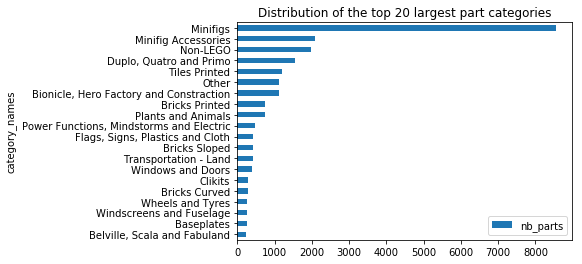

In [8]:
#get the top 20 part categories from the parts dataframe
df_max_parts = parts.part_cat_id.value_counts()[:20].to_frame()

#merge with the part_categories dataframe to get the names of the categories 
top_categories = pd.merge(part_categories, df_max_parts, left_on='id', right_index=True)\
                    .sort_values(by='part_cat_id')\
                    .drop(['id'], axis = 1)\
                    .rename(columns = {'part_cat_id': 'nb_parts', 'name': 'category_names'})

#plot
top_categories.plot(kind='barh', x = 'category_names', title='Distribution of the top 20 largest part categories')

The top 20 categories were acquired by counting the total occurence of each *part categories ids*. In order to get the name of each categories, the two datasets *part_categories* and *parts* (already reduced to the top 20) were merged according to their "*id*" column.

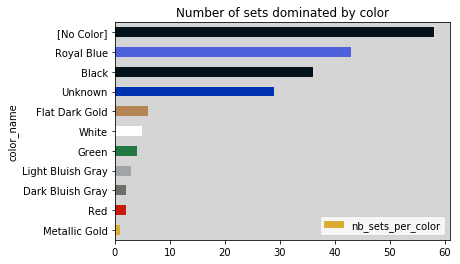

In [9]:
#3
#Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. 
#Color each bar with the respective color that it represents.

#get the most common color id of an inventory id from the inventory_parts set 
inv_id_with_max_color = inventory_parts \
    .drop(['is_spare', 'part_id'], axis = 1) \
    .groupby(['inventory_id', 'color_id']).sum()\
    .sort_values(['inventory_id', 'quantity'], ascending=False)\
    .groupby(['inventory_id']).head(1)\
    .drop(['quantity'], axis = 1)\
    .reset_index()

#merge with the inventory_sets dataframe to count the color id with the most sets
set_count_per_color_id = pd.merge(inv_id_with_max_color, inventory_sets)\
    .drop(['inventory_id','quantity'], axis = 1)\
    .groupby(['color_id']).count()\
    .reset_index()\
    .rename(columns={'set_id':'nb_sets_per_color', 'color_id': 'id'})


#merge with the colors dataframe to get the rgb value of each color id
set_count_per_color = pd.merge(set_count_per_color_id, colors)\
                        .sort_values(by='nb_sets_per_color')\
                        .rename(columns={'name': 'color_name'})

#add a '#' to each rgb value so the plotter can interpret it
for i in range(len(set_count_per_color)):
    set_count_per_color['rgb'][i] = '#' + set_count_per_color['rgb'][i]
    
#plot (unknown will be default blue, no color will be black)
plot = set_count_per_color.plot(kind='barh', x='color_name', \
                                y='nb_sets_per_color', color=set_count_per_color['rgb'],\
                                title='Number of sets dominated by color')

#set the background to grey so we can see the white bar
plot.set_facecolor('#D5D5D5')


To find the dominant color of each set. We first identify the most common color id of an inventory id from the inventory_parts set. Then it was merged with the inventory_sets according to their “inventory id” column in order to link the set id with the most common color. Once we had the dominant color id linked to the sets id we just merge our new set with the colors dataframe in order to get the corresponding RGB value for each color id. The # was added to each RGB value in order to get python to understand it and we then plot it in an horizontal bar chart using these values.
Note that a set have two dominant colors one is chosen as random. Sets with “no color” as dominant are represented by black and were the most frequent. Unknown colors were represented by default blue.

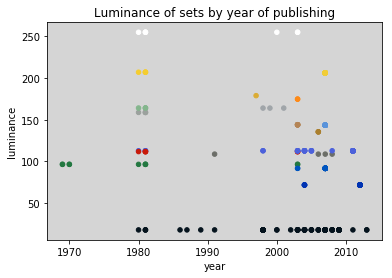

In [10]:
#4:
#Create a scatter plot of the luminance* of the sets vs their publishing year. 
#What do you observe for the years 1980-1981? How do you interpret what you see?

#map each inventory id to the most common color in it
inv_id_with_max_col = inventory_parts \
    .drop(['is_spare', 'part_id'], axis = 1) \
    .groupby(['inventory_id', 'color_id']).sum()\
    .sort_values(['inventory_id', 'quantity'], ascending=False)\
    .drop(['quantity'], axis = 1)\
    .reset_index()

#map each set id to its most common color
set_with_col = pd.merge(inv_id_with_max_col, inventory_sets)\
    .drop(['inventory_id','quantity'], axis = 1)

#add rgb values
set_with_rgb = pd.merge(set_with_col, colors, left_on='color_id', right_on='id')\
    .drop(['id', 'name', 'is_trans'], axis = 1)

#add year values
set_rgb_year = pd.merge(set_with_rgb, sets, left_on='set_id', right_on='id')\
    .drop(['name', 'theme_id', 'num_parts', 'id'], axis = 1)

#create column to store luminance
set_rgb_year['luminance'] = 0.0


def compute_luminance(rgb_string):
    R = int(rgb_string[0:2], 16)
    G = int(rgb_string[2:4], 16)
    B = int(rgb_string[4:6], 16)
    return np.sqrt(0.299*R*R + 0.587*G*G + 0.114*B*B)

#fill in luminance column
for i in range(len(set_rgb_year)):
    set_rgb_year['luminance'][i] = compute_luminance(set_rgb_year['rgb'][i])
    set_rgb_year['rgb'][i] = '#' + set_rgb_year['rgb'][i]
    
#convert years to numbers (remember these have already been cleaned)
set_rgb_year[['year']] = set_rgb_year[['year']].apply(pd.to_numeric)

#plot
scatterplot = set_rgb_year.plot(\
                                kind='scatter',\
                                x = 'year',\
                                y = 'luminance',\
                                color=set_rgb_year['rgb'],\
                                title='Luminance of sets by year of publishing')

#set grey background so white dots are visible
scatterplot.set_facecolor('#D5D5D5')

To create the scatter plot of the luminance of the sets versus their publishing year we link the sets id with their most common color (rgb values) as before and merged our dataset with sets accorind to the set_id in order to get the publishing years. We then create a new column where we calculate and stock the luminance value for each row. The years and the luminance values are then used to create the scatter plot.

We can observe that there is new combinations between 1980 and 2010. This is explained by the fact that in the early 1980’s they were only 16 colors in the Lego color palette against 39 colors  by the late 1990’s. We can see that most of the sets are dominated by blue or black as observed previously. 

1980 and 1981 are identical, which is very unlikely -> we have 3 theories:
1. Someone made a mistake while entering data for the years 1980 or 1981 and now both years have identical data
2. Lego published sets with the exact same colors two years in a row (possible, but unlikely)
3. We corrupted the data by setting the '80s' to the year 1980 and the data for this year is supposed to be spread over the entire decade

__\* Briefly explain your approach for every query here \*__

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [11]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [12]:
bikes = pd.read_json(BIKES_DATA_FOLDER + '/metro-bike-share-trip-data.json.zip')

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [13]:
###### Write your code here

#Helper function that checks if a column should have a datetime in it based on its name
def isDatetime(col_name):
    return 'Time' in col_name

#helper function to print detailed information about a dataframe
def print_info_long(frame):
    print('Info Long-------------------------------------------')
    for column in frame:
        #print column name
        print(str(column) + ': ')
        #print type
        elem_type = frame[column].dtype.name
        print('Type: ' + str(elem_type))
        
        #print range, depending on type
        print('Range: {')
        #datetime: print earliest and latest date
        if isDatetime(column):
            dates = pd.to_datetime(frame[column])    
            print(str(min(dates)) + ' - ' + str(max(dates)))
            
        #object or category: print all possible values
        elif elem_type == 'object' or elem_type == 'category':
            unique_elems = set(frame[column])
            for elem in unique_elems:
                print(elem)
        
        #other: print smallest and biggest
        else:
            print( str(frame[column].min()) + ' - ' + str(frame[column].max()))
            
        print('}')
        print(' ')
        
    #print shape
    print('Shape: ' + str(frame.shape))
    print(' ')

#helper function to print summary information about a dataframe
def print_info_short(frame):
    print('Info Short-------------------------------------------')
    for column in frame:
        #print column names
        print(str(column) + ': ')
        #print type of data in column
        elem_type = frame[column].dtype.name
        print('Type: ' + str(elem_type))
        print(' ')
    #print shape
    print('Shape: ' + str(frame.shape))
    print(' ')
    
        
print_info_long(bikes)

#Categorical: set to type "category"
#Passholder type
bikes['Passholder Type'] = bikes['Passholder Type'].astype('category')
#Trip Route Category
bikes['Trip Route Category'] = bikes['Trip Route Category'].astype('category')

print_info_long(bikes)


Info Long-------------------------------------------
Bike ID: 
Type: float64
Range: {
1349.0 - 6728.0
}
 
Duration: 
Type: int64
Range: {
60 - 86400
}
 
End Time: 
Type: object
Range: {
2016-07-07 04:20:00 - 2017-04-02 10:32:00
}
 
Ending Station ID: 
Type: float64
Range: {
3000.0 - 4108.0
}
 
Ending Station Latitude: 
Type: float64
Range: {
0.0 - 34.0642815
}
 
Ending Station Longitude: 
Type: float64
Range: {
-118.472832 - 0.0
}
 
Passholder Type: 
Type: object
Range: {
Staff Annual
Walk-up
Monthly Pass
Flex Pass
}
 
Plan Duration: 
Type: float64
Range: {
0.0 - 365.0
}
 
Start Time: 
Type: object
Range: {
2016-07-07 04:17:00 - 2017-03-31 23:45:00
}
 
Starting Station ID: 
Type: float64
Range: {
3000.0 - 4108.0
}
 
Starting Station Latitude: 
Type: float64
Range: {
0.0 - 34.0642815
}
 
Starting Station Longitude: 
Type: float64
Range: {
-118.472832 - 0.0
}
 
Trip ID: 
Type: int64
Range: {
1912818 - 23794218
}
 
Trip Route Category: 
Type: object
Range: {
One Way
Round Trip
}
 
Shape: 

Two attributes are categorical : ‘Passholder Type’ and ‘Trip Route Category’ and we change the type from object to category which facilitate memory optimization and sorting.

In [14]:
#Redundancies: Pitfall: if one value changes, the other not: inconsistency

#Redundancy: Station id <-> longitude + latitude : we only keep station ids and move lon/lat to separate table

#get the ids, longitudes and latitiudes of starting stations
start_stations = bikes[['Starting Station ID', 'Starting Station Latitude', 'Starting Station Longitude']
                      ].copy().drop_duplicates()
start_stations_renamed = start_stations.rename(columns={'Starting Station ID': 'Station ID', 
                         'Starting Station Latitude': 'Latitude', 
                         'Starting Station Longitude':'Longitude'})

#get the ids, longitudes and latitiudes of ending stations
end_stations = bikes[['Ending Station ID', 'Ending Station Latitude', 'Ending Station Longitude']
                    ].copy().drop_duplicates()

end_stations_renamed = end_stations.rename(columns={'Ending Station ID': 'Station ID', 
                         'Ending Station Latitude': 'Latitude', 
                         'Ending Station Longitude':'Longitude'})

#join the starting and ending stations to one dataframe
stations = pd.merge(start_stations_renamed, end_stations_renamed).drop_duplicates()

#Redundancy: Passholder type <-> Plan Duration: we only keep passholder types
plan_durations = bikes[['Passholder Type', 'Plan Duration']].copy().drop_duplicates()

##Redundancy: Round trip: Start station ID = End station ID/ One way: Start station ID != End station ID: 
#we extract the trip route category
trip_routes = bikes[['Ending Station ID', 'Starting Station ID', 'Trip Route Category']].copy().drop_duplicates()

#Duration <-> End time - Start time in seconds: we extract the end time
durations = bikes[['Start Time', 'End Time', 'Duration']].copy().drop_duplicates()


In [15]:
print_info_short(stations)
print_info_short(plan_durations)
print_info_short(trip_routes)
print_info_short(durations)

Info Short-------------------------------------------
Station ID: 
Type: float64
 
Latitude: 
Type: float64
 
Longitude: 
Type: float64
 
Shape: (129, 3)
 
Info Short-------------------------------------------
Passholder Type: 
Type: category
 
Plan Duration: 
Type: float64
 
Shape: (5, 2)
 
Info Short-------------------------------------------
Ending Station ID: 
Type: float64
 
Starting Station ID: 
Type: float64
 
Trip Route Category: 
Type: category
 
Shape: (3703, 3)
 
Info Short-------------------------------------------
Start Time: 
Type: object
 
End Time: 
Type: object
 
Duration: 
Type: int64
 
Shape: (125912, 3)
 


In [16]:
#Drop values stored in other tables
bikes.drop(['Trip Route Category'], axis = 1, inplace = True)
bikes.drop(['Plan Duration'], axis = 1, inplace = True)
bikes.drop(['Starting Station Latitude', 
            'Starting Station Longitude', 
            'Ending Station Latitude', 
            'Ending Station Longitude'], axis = 1, inplace = True)
bikes.drop(['End Time'], axis = 1, inplace = True)
print_info_short(bikes)

Info Short-------------------------------------------
Bike ID: 
Type: float64
 
Duration: 
Type: int64
 
Ending Station ID: 
Type: float64
 
Passholder Type: 
Type: category
 
Start Time: 
Type: object
 
Starting Station ID: 
Type: float64
 
Trip ID: 
Type: int64
 
Shape: (132427, 7)
 


Redundant columns were found in the dataset, data redundancy as here can be dangerous. It can lead to data inconsistency since one update of a column does not automatically update another column. As a result, pieces of data that are supposed to be identical can end up having different values. 

Station_ID column was redundant with the Longitude and Latitude since these columns help to identify one station we only kept station_ID and move lon/lat to separate table. Station ID were taken from Starting and Ending stations and were put in one dataframe with the latitude and longitude.

We dropped Latitude and longitude from bikes dataset because we never use it later unlike station ID.

Trip Route category can directly be found by comparing starting and ending station (Round trip if the same) thus we extracted the trip route category with the ID of starting and ending station. Thus we dropped trip route category and kept the starting and ending station ID.

The same manipulation were done for the duration, start time and end time (duration is the difference between end time and start time). We dropped the end time because we didn’t use it neither.


__\* Briefly explain your approach here \*__
Explained in code subsets

# B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

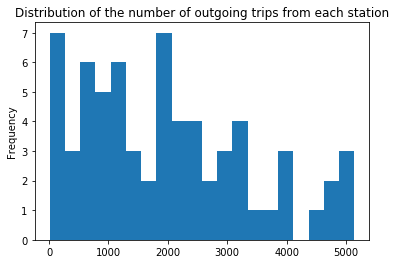

In [17]:
# Write your code here
#1
#Plot the distribution of the number of outgoing trips from each station in a histogram with 20 bins 
#(Hint: each bin describes a range of counts, not stations).

#Get the outgoing stations
outgoing_trip_per_station = bikes['Starting Station ID'].to_frame()
#Column countind number of leaving trips
outgoing_trip_per_station['Outgoing'] = 1
#sum leaving trips by station
outgoing_trips = outgoing_trip_per_station.groupby('Starting Station ID').sum().reset_index()
#sort the outgoing trip numbers
outgoing = outgoing_trips['Outgoing'].sort_values()

#plot
outgoing.plot(kind='hist', bins=20, title='Distribution of the number of outgoing trips from each station')


The distribution was done by summing the number of time a station was referenced as Starting one for leaving trips, for each station. Independently of the station ID we then plot the starting occurrence distribution. 

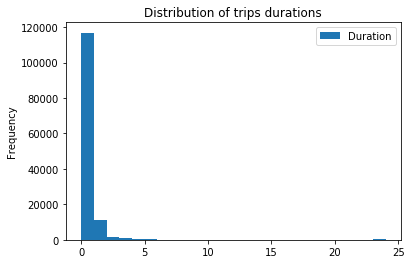

In [18]:
#2
#Plot histograms for the duration and (trip starting hour in the day) attributes. 
#For both the duration and the trip starting hour use discrete 1-hour intervals. 
#What do you observe in each plot? What are some popular values in the duration plot? 
#Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior.

#Duration attribute
durations_count = bikes['Duration'].to_frame()

#round Durations from seconds to hours
length = len(durations_count['Duration'])
for i in range(length):
    duration_seconds = durations_count['Duration'][i]
    duration_hours = duration_seconds/(60 * 60)
    durations_count['Duration'][i] = round(duration_hours)

#plot
durations_count.plot(kind='hist', bins=24, title='Distribution of trips durations')

To plot the duration we extracted the duration in a separate dataframe. Since it was given in second we rounded it to hours and plotted it with 24 bins for 24 hours.

The local maxima at 24 hours is explained by the fact that during data processing trip length were capped at 24 hours.

Observations: 
 1. The most popular duration by far is one hour, then two -> people rent bikes mostly for short trips
 2. Small spike at 24 -> people who took the bike the entire day (for example went home with it for the night)

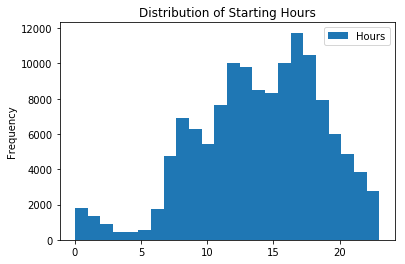

In [19]:
#Starting hour attribute
starting_hours = bikes['Start Time'].to_frame()

#Helper to extract hours from datetimes 
def get_hours(df, column):
    df['Hours'] = 0;
    nb_dates = len(df[column])
    for i in range(nb_dates):
        df['Hours'][i] = pd.to_datetime(df[column][i]).hour

get_hours(starting_hours, 'Start Time')

#plot
starting_hours['Hours'].to_frame().plot(kind='hist', bins=24, title='Distribution of Starting Hours')


Observations:
 * 23:00 - 06:00: few bikes rented -> people are sleeping, or do not want to bike in the dark (few drunks as well)
 * 07:00 - 09:00: first spike -> people going to school or work
 * 10:00 - 11:00: local minimum -> people stay at school/work
 * 11:00 - 13:00: second, higher spike -> people going to and from lunch
 * 14:00 - 15:00: local minimum -> people back at school/work
 * 16:00 - 18:00: biggest spike -> people leaving school and work to go home 
(especially school: kids and teenagers are more likely to use bikes in the afternoon, when they are full of energy,
than in the morning)
 * 19:00 - 23:00: progressive drop-off as people return home and go to sleep

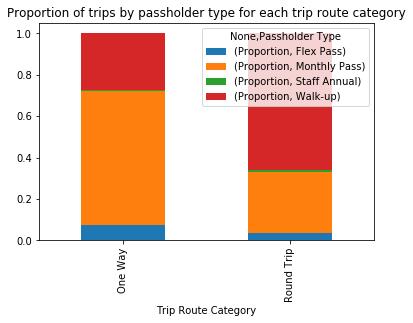

In [20]:
#3
#For each trip route category, calculate the proportion of trips by passholder type and present your results 
#in a stacked bar chart with normalized height.

#get data for use in two different dataframes, one for the proportion and one for the overall values
df_count = pd.merge(bikes, trip_routes)[['Passholder Type', 'Trip Route Category']].copy()
df_total = pd.merge(bikes, trip_routes)[['Trip Route Category']].copy()

#Get the number of trips by passholder type
df_count['Count'] = 1
trips_by_pass = df_count.groupby(['Trip Route Category', 'Passholder Type']).count().reset_index()

#Get the total numer of trips
df_total['Total'] = 1
total_by_trip = df_total.groupby('Trip Route Category').count().reset_index()

#Calculate the normailzed proportion of trips by passholder type (nb trips by type/ total nb trips)
with_proportion = pd.merge(trips_by_pass, total_by_trip)
with_proportion['Proportion'] = 0.0

nb_combs = len(with_proportion)
for i in range(nb_combs):
    with_proportion['Proportion'][i] = with_proportion['Count'][i]/ with_proportion['Total'][i]

    
#prepare dataframe for plotting
proportion = with_proportion.drop(['Count', 'Total'], axis=1).set_index(['Trip Route Category', 'Passholder Type'])

#pivot data for stacking by slices of proportion 
stacked_trips = proportion.pivot_table(values=['Proportion'], 
                      index='Trip Route Category',
                      columns='Passholder Type',
                      aggfunc='sum')

stacked_trips.plot(kind='bar', stacked=True, title='Proportion of trips by passholder type for each trip route category')


To calculate the proportion of trips by passholder type we need number of trips by passholder type and the total of passholder for each types. So we created a column for each and find the values by grouping. Then we normalized these value by dividing the first by the second.

In order to get a stacked chart we pivoted the table according to trip route category.

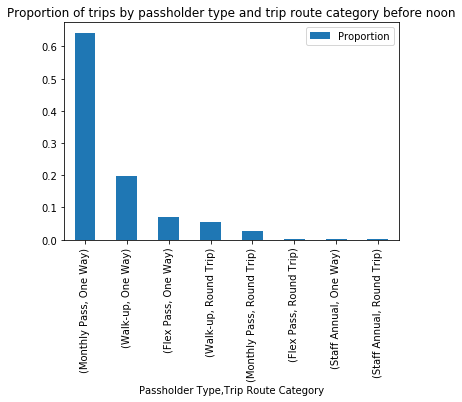

In [21]:
#4
#Considering only trips that begin in the morning hours (before noon), plot in a single bar chart the proportion of 
#trips by passholder type and trip route category. Explain any outliers you observe.

#get trip route info from separate table
bikes_trips = pd.merge(bikes, trip_routes)

#round start time to hours
get_hours(bikes_trips, 'Start Time')

#filter to only trips starting before noon
bikes_trips_2 = bikes_trips[bikes_trips['Hours'] < 12][['Passholder Type', 'Trip Route Category']]\
    .set_index(['Passholder Type', 'Trip Route Category'])

#Count the number of trips by passholder type and trip route category
bikes_trips_2['Count'] = 1.0
bikes_trips_3 = bikes_trips_2.groupby(['Passholder Type', 'Trip Route Category']).count()

#Get the total number of trips
total = bikes_trips_3['Count'].sum()

#calculate and store the proportion of trips by passholder type and trip route category
bikes_trips_3['Proportion'] = 0.0
length = len(bikes_trips_3['Count'])

for i in range(length):
    count = bikes_trips_3['Count'][i]
    bikes_trips_3['Proportion'][i] = count/total
    
    
#plot
bikes_trips_3.drop('Count', axis=1).sort_values(by='Proportion', ascending=False).plot(kind='bar',\
                                    title='Proportion of trips by passholder type and trip route category before noon')


We then did the same manipulation but the first values was the number of trip types by passholder types filtering for the trips starting before noon. The total is just the number of all trips.

Outliers:
 1. The vast majority of trips are one-way on a monthly pass: people go from one station to another every day,
 but not back. This is consistent with the chart showing starting times (mostly afternoon), suggesting people use 
 bikes mostly to travel at certain times of day 
(so they are only doind one-way trips, for example from work/school to home in the afternoon)

 2. Staff either represents very few people, or they never use the bikes themselves

In [22]:
#5
#Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the 
#stations. For each of the two intervals calculate the proportion of trips by passholder type and trip route category. 
#Present your results in a DataFrame which has a unique, non-composite index. Does the proportion of trips depend 
#on whether it is the first or second hour interval? Would the company have any significant benefit by creating a 
#more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on 
#the second one? Assume that the number of trips per interval will not change if the scheme changes.

#Reuse the dataframe from exercice 4, where the hours are already calculated
pass_trip_hours = bikes_trips[['Bike ID', 'Passholder Type', 'Trip Route Category', 'Hours']].copy()

#get two intevalls (found by trial and error): best division time: 15:00
pass_trip_hours_early = pass_trip_hours[pass_trip_hours['Hours'] < 15].copy()
pass_trip_hours_late = pass_trip_hours[pass_trip_hours['Hours'] >= 15].copy()
print("Early: " + str(len(pass_trip_hours_early['Hours'])))
print("Late: " + str(len(pass_trip_hours_late['Hours'])))


#Parse a column which gives the intervall
total_len = len(pass_trip_hours['Bike ID'])
pass_trip_hours['Intervall'] = 0

for i in range(total_len):
    if pass_trip_hours['Hours'][i] < 15:
        pass_trip_hours['Intervall'][i] = 1
    else:
        pass_trip_hours['Intervall'][i] = 2
        

#Calculate the proportion of trips by passholder type and trip route category for each intervall
pass_trip_hours['Count'] = 1.0
pass_trip_hours_2 = pass_trip_hours.groupby(['Intervall', 'Passholder Type', 'Trip Route Category']).count().reset_index()


pass_trip_hours_2['Proportion'] = 0.0
total_intervall_1 = len(pass_trip_hours_early['Bike ID'])
total_intervall_2 = len(pass_trip_hours_late['Bike ID'])

length = len(pass_trip_hours_2['Bike ID'])

for i in range(length):
    count = pass_trip_hours_2['Count'][i]
    if pass_trip_hours_2['Intervall'][i] == 1:
        pass_trip_hours_2['Proportion'][i] = pass_trip_hours_2['Count'][i]/total_intervall_1
    else:
         pass_trip_hours_2['Proportion'][i] = pass_trip_hours_2['Count'][i]/total_intervall_2
            
#Drop useless intermediary columns
pass_trip_hours_2.drop(['Hours', 'Count'], axis=1)


Early: 66560
Late: 65952


,Intervall,Passholder Type,Trip Route Category,Bike ID,Proportion
0,1,Flex Pass,One Way,4626,0.069501
1,1,Flex Pass,Round Trip,268,0.004026
2,1,Monthly Pass,One Way,39369,0.591481
3,1,Monthly Pass,Round Trip,2064,0.031070
4,1,Staff Annual,One Way,182,0.002749
5,1,Staff Annual,Round Trip,56,0.000886
6,1,Walk-up,One Way,15798,0.237380
7,1,Walk-up,Round Trip,4185,0.062906
8,2,Flex Pass,One Way,4416,0.066958
9,2,Flex Pass,Round Trip,215,0.003260


We reused the dataframe from previous question (B.3.4) because it already has the hours. By trials and errors we divided these data into two groups : before and after 3 pm and created a column marking interval 1 or 2.

We then calculated the proportions as above for each interval and display it.

Analysis:

There is never a significant difference between intervalls 1 and 2

Intervall 1 is always slightly larger because more of the trips fall into this category in general (66560 > 65952)

Therefore, the company could as a whole charge slightly more for bikes rented before 15:00

__\* Briefly explain your approach for every query here \*__
Explained in code subsets